# Exercise: Distributed Monte Carlo (Distributed.jl)

Calculate the value of $\pi$ through parallel direct Monte Carlo.

A unit circle is inscribed inside a unit square with side length 2 (from -1 to 1). The area of the circle is $\pi$, the area of the square is 4, and the ratio is $\pi/4$. This means that, if you throw $N$ darts randomly at the square, approximately $M=N\pi/4$ of those darts will land inside the unit circle.

Throw darts randomly at a unit square and count how many of them ($M$) landed inside of a unit circle. Approximate $\pi \approx 4M/N$. Visualization:

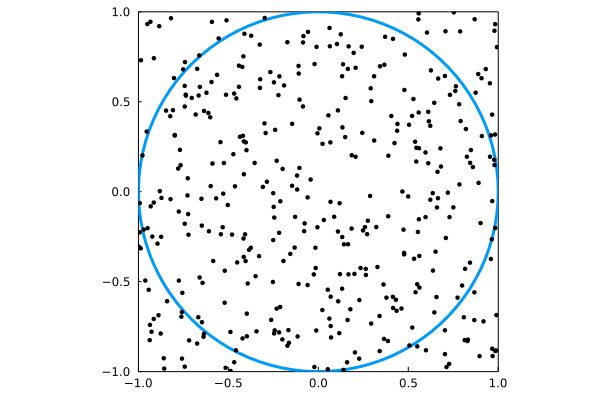

In [1]:
using Plots, Distributions

# plot circle
circlepts = Plots.partialcircle(0, 2π, 100)
plot(circlepts, aspect_ratio=:equal, xlims=(-1, 1), ylims=(-1, 1), legend=false, lw=3, grid=false, frame=:box)

# plot darts
N = 400
d = Uniform(-1, 1)
scatter!(rand(d, N), rand(d, N), ms=2.5, color=:black)

### Basic Julia Implementation

In [2]:
function compute_pi(N)
    M = 0 # number of darts that landed in the circle
    for i in 1:N
        if sqrt(rand()^2 + rand()^2) < 1.0
            M += 1
        end
    end
    return 4 * M / N
end

compute_pi (generic function with 1 method)

In [4]:
compute_pi(10_000_000)

3.14181

### Tasks

1. Based on `compute_pi`, write a function `compute_pi_parallel(N::Int, nworkers::Int)` which does the same but divides the work among `nworkers`-many processes.

2. Benchmark and compare the serial and parallel variants.

3. Write a function `compute_pi_multiple(Ns::Vector{Int})` which computes $\pi$ for all given $N$ values. The function should be serial and based on the given `compute_pi`.

4. Write a function `compute_pi_multiple_parallel(Ns::Vector{Int})` which does the same as in 3) but in parallel. The function should also be based on `compute_pi`.

5. Benchmark and compare the methods from 3) and 4).

6. Calculate $\pi$ estimates for `Ns = ceil.(Int, exp10.(range(1, stop=8, length=50)))`. Plot $\pi$ vs $N$ on a semi-log plot (i.e. provide `xscale=:log10` as a keyword argument to `plot`).

A reasonable value could be `N = 10_000_000`.